## Data Replication

Gather Minecraft skins from the following site: https://www.minecraftskins.com/

In [21]:
def get_profile_links(page_html):
    """
    Purpose: Get links to each skin's profile on a single page
    Params:
        page_html - the raw html page
    Returns: list of profile links for that page
    """
    profile_links = [x.find('a').get('href') for x in page_html.find_all('div', {'class': 'skin-img'})]
    return profile_links

In [33]:
def get_img_links(num_pages, url):
    """
    Purpose: Gather image links to all skins for a desired number of pages
    Params:
        num_pages - number of pages to scrape (will stop when max is reached)
        url - main website url
    Returns: list of image links
    """
    assert num_pages <= 50, 'Maximum number of pages to scrape is 50'
    assert url != '', 'URL cannot be empty'
    assert num_pages > 0, 'Cannot scrape negative or 0 pages'
    assert url[-1] == '/', 'URL must end with "/"'
    
    # data structure for skin images
    img_links = []
    
    # connect to website
    req = r.get(url)
    if req.ok == False:
        print('# Error connecting to', url)
        return
    soup = BeautifulSoup(req.text, 'lxml')

    # grab profile links on each page
    for i in range(1, num_pages+1):
        profile_links = [url[:-1]+x for x in get_profile_links(BeautifulSoup(r.get(url+str(i)).text, 'lxml'))]
        
        # for each profile obtain image link
        for profile in profile_links:
            req = r.get(profile)
            if req.ok == False:
                print('# Error accessing the following url:', profile)
                continue
            
            # parse out image link
            soup = BeautifulSoup(req.text, 'lxml')
            img_link = soup.find('input', {'id': 'image-link-code'}).get('value')
            if img_link is None:
                print('# Error obtaining image from profile')
                continue
            img_links.append(img_link)
            time.sleep(1)
        
    return img_links

In [3]:
# imports
import requests as r
from bs4 import BeautifulSoup
import time

In [31]:
# main
url = 'https://www.minecraftskins.com/'
img_links = get_img_links(1, url)

In [32]:
img_links

['https://www.minecraftskins.com/uploads/skins/2020/04/22/d-r-e-a-m-s-14184007.png?v192',
 'https://www.minecraftskins.com/uploads/skins/2020/04/23/day-one---stars-14187763.png?v192',
 'https://www.minecraftskins.com/uploads/skins/2020/04/21/r-i-p-nan--i-love-you-always----break-14176173.png?v192',
 'https://www.minecraftskins.com/uploads/skins/2020/04/22/----k-i-t-s-u-n-e-----14182899.png?v192',
 'https://www.minecraftskins.com/uploads/skins/2020/04/23/ghost-gamer-boy---palette-colour-14-comp-entry--14186587.png?v192',
 'https://www.minecraftskins.com/uploads/skins/2020/04/22/--a-r-u-a-n-d-a---14185821.png?v192',
 'https://www.minecraftskins.com/uploads/skins/2020/04/22/sandwich-scizor-14185264.png?v192',
 'https://www.minecraftskins.com/uploads/skins/2020/04/22/freedom-14185317.png?v192',
 'https://www.minecraftskins.com/uploads/skins/2020/04/22/--national-earth-day---14181588.png?v192',
 'https://www.minecraftskins.com/uploads/skins/2020/04/23/cute-girl-revamp--14186061.png?v192',
 

In [6]:
# get count of available pages to scrape
soup = BeautifulSoup(req.text, 'lxml')
page_cnt = int(soup.find('div', {'class': 'pagination'}).find_all('li')[-2].text.strip())
print('Available pages to scrape:', page_cnt)

# get skin links
links = compile_skin_links(page_cnt, req, url)

Available pages to scrape: 7


In [44]:
from urllib.request import Request, urlopen
from skimage import io
import shutil

In [50]:
# Using new links download each image
i = 0
for l in img_links:
    req = Request(l, headers={'User-Agent': 'Mozilla/5.0'})
    fname = str(i) + '.png'
    f1 = open(fname, 'wb')
    f1.write(urlopen(req).read())
    f1.close()
    shutil.move(fname, '../data')
    i += 1
    time.sleep(1)

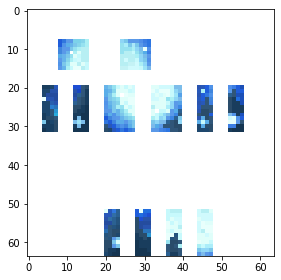

In [43]:
io.imshow(io.imread('0.png'))

In [48]:
shutil.move('data', '../data')

'../data\\data'

In [3]:
import shutil
import os

In [9]:
#shutil.rmtree('../data')
os.mkdir('../data')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: '../data'